In [8]:
from utils import *
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

In [9]:
# generate sample object
N = 5000
setup = {
    'N': 8192,
    'L': 2e-3, # 1mm
    'lambda_0': 650e-9, # 650nm, red light
    'f1': 45e-3, # 45mm
    'f2': 25e-3, # 25mm
    'A': 5e-3, # 5mm
    'plot': True
}
n = setup['N']
sample_size = 4096
sample = test_sum(sample_size, a=255, n_cycles=50, sigma=0.1)
object = np.zeros(n, dtype=np.complex128)
object[n//2-sample_size//2:n//2+sample_size//2] = sample

Output field length: 1.1656860986547084mm


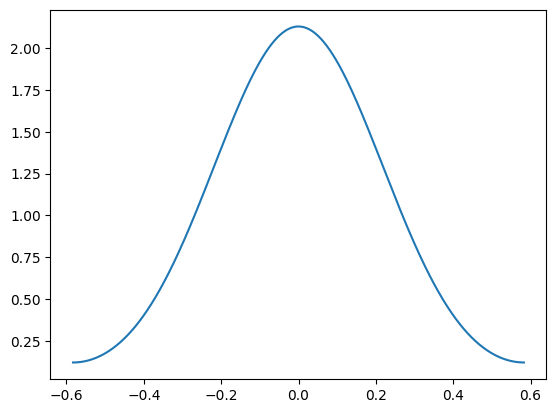

In [10]:
L = 223e-3 # field length in meters
w = 0.1e-3 # diameter of the LED in meters (gaussian width)
lambda_0 = 650e-9 # wavelength in meters
z = 0.08 # distance from LED to sample in meters
w_samples = int((w / L) * N) # number of samples for the gaussian width

x = np.arange(-N/2, N/2) # coordinates in samples
x_mm = (x * L / N)*1000 # coordinates in mm
source = gauss_1d_fwhm(x, N/4, w_samples) # gaussian source

# compute coordinates for sample field
kx = np.fft.fftfreq(N, d=L/N) # spatial frequencies
kx = np.fft.fftshift(kx)*lambda_0*z
kx_mm = kx*1000 # spatial frequencies in mm
output = fftshift(fft(source)) # compute the output field

L_o = np.max(kx) - np.min(kx) # output field length in meters
L_o_mm = L_o*1000 # output field length in mm
print('Output field length: {}mm'.format(L_o_mm))

plt.plot(kx_mm, np.abs(output))

In [11]:
# output_sample = np.asarray([output[i] for i in range(len(kx)) if kx[i] < setup['L']/2 and kx[i] > -setup['L']/2])
# print('Number of samples in sample object: {}'.format(len(output_sample)))
# sample_illumination = np.zeros(sample_size, dtype=np.complex128)
# sample_illumination.real = signal.decimate(output_sample.real, output_sample.size//sample_size)
# sample_illumination.imag = signal.decimate(output_sample.imag, output_sample.size//sample_size)

# sample_illumination = np.asarray([np.mean(output_sample[4*i:4*i+4]) for i in range(0, sample_size)])


# plt.plot(np.abs(output_sample))
# ax1.set_xlim(0, 250)
# ax2.set_xlim(0, 250)

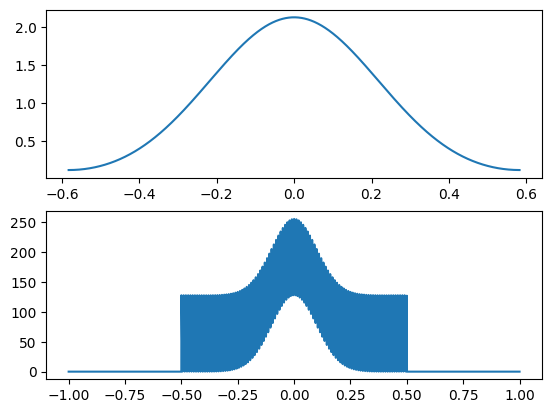

In [12]:
object_x_mm = np.linspace(-setup["L"]/2, setup["L"]/2, n) * 1000
_, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(kx_mm, np.abs(output))
ax2.plot(object_x_mm, np.abs(object))

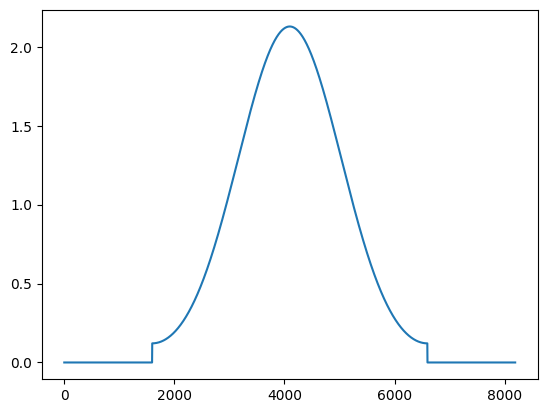

In [13]:
# create a field the same size as the sample field for the illumination
illumination = np.zeros(n, dtype=np.complex128)
illumination[n//2-N//2:n//2+N//2] = output
plt.plot(np.abs(illumination))

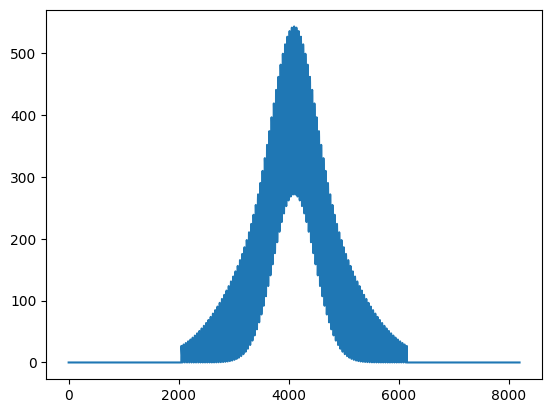

In [14]:
object_field = illumination * object
plt.plot(np.abs(object_field))